In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv").sort_values(by=['countriesAndTerritories','year', 'month', 'day'])
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
81,31/12/2019,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0
80,01/01/2020,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
79,02/01/2020,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
78,03/01/2020,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
77,04/01/2020,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
7897,27/03/2020,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
7896,28/03/2020,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0
7895,29/03/2020,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0
7894,30/03/2020,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0


In [3]:
data['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'British_Virgin_Islands', 'Brunei_Darussalam', 'Bulgaria',
       'Burkina_Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland_Islands_(Malvinas)'

In [4]:
df = pd.DataFrame()
df['date'] = pd.to_datetime(data['dateRep'], format='%d/%m/%Y')
df['country'] = data['countriesAndTerritories']
df['code'] = data['countryterritoryCode']
df['cases'] = data['cases']
df['deaths'] = data['deaths']
df

,date,country,code,cases,deaths
81,2019-12-31,Afghanistan,AFG,0,0
80,2020-01-01,Afghanistan,AFG,0,0
79,2020-01-02,Afghanistan,AFG,0,0
78,2020-01-03,Afghanistan,AFG,0,0
77,2020-01-04,Afghanistan,AFG,0,0
...,...,...,...,...,...
7897,2020-03-27,Zimbabwe,ZWE,0,0
7896,2020-03-28,Zimbabwe,ZWE,2,0
7895,2020-03-29,Zimbabwe,ZWE,2,0
7894,2020-03-30,Zimbabwe,ZWE,0,0


In [5]:
df.groupby('country')['deaths'].apply(lambda x: x.cumsum())


81      0
80      0
79      0
78      0
77      0
       ..
7897    1
7896    1
7895    1
7894    1
7893    1
Name: deaths, Length: 7904, dtype: int64

In [6]:
df['cum_cases'] = df.groupby('country')['cases'].cumsum()
df['cum_deaths'] = df.groupby('country')['deaths'].cumsum()
df[df['country'] == 'Germany']

,date,country,code,cases,deaths,cum_cases,cum_deaths
2897,2019-12-31,Germany,DEU,0,0,0,0
2896,2020-01-01,Germany,DEU,0,0,0,0
2895,2020-01-02,Germany,DEU,0,0,0,0
2894,2020-01-03,Germany,DEU,0,0,0,0
2893,2020-01-04,Germany,DEU,0,0,0,0
...,...,...,...,...,...,...,...
2810,2020-03-27,Germany,DEU,5780,55,42288,253
2809,2020-03-28,Germany,DEU,6294,72,48582,325
2808,2020-03-29,Germany,DEU,3965,64,52547,389
2807,2020-03-30,Germany,DEU,4751,66,57298,455


In [7]:
df = df.sort_values(by = 'date')

In [8]:
start_100_cases = df[df['cum_cases'] > 100]
start_100_deaths = df[df['cum_deaths'] > 100]
#start_100_cases[start_100_cases['country'] == 'France']

In [9]:
#start_100_cases[start_100_cases['country'] == 'France']['cum_cases']

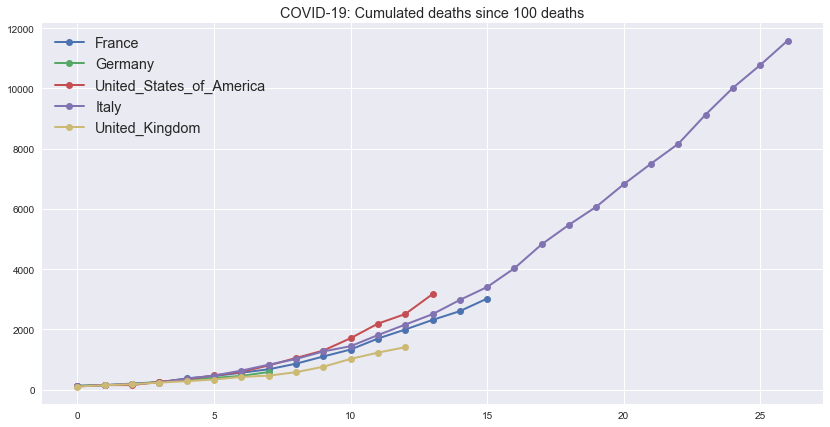

In [10]:
fig, ax = plt.subplots(figsize=(14,7))
for code in ['France','Germany','United_States_of_America','Italy','United_Kingdom']:
    plt.plot(start_100_deaths[start_100_deaths['country'] == code]['cum_deaths'].values, label=code, linewidth=2, marker='o')

plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Cumulated deaths since 100 deaths', fontsize='x-large')
plt.show()

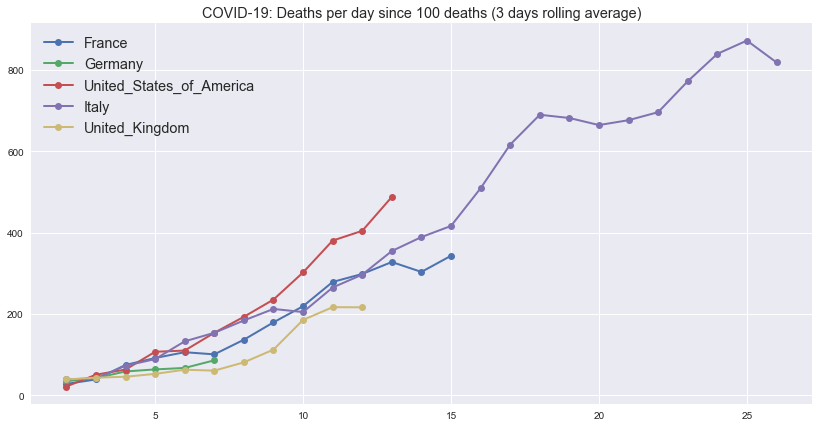

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
for code in ['France','Germany','United_States_of_America','Italy','United_Kingdom']:
    plt.plot(start_100_deaths[start_100_deaths['country'] == code]['deaths'].rolling(window=3).mean().values, label=code, linewidth=2, marker='o')

plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Deaths per day since 100 deaths (3 days rolling average)', fontsize='x-large')
plt.show()